# Image Classification for Beginners (CNN - Keras)

In this notebook, We will try to classify images by implementing CNN with Keras from a beginners perspective

Following will be our course of action:

* Import Packages
* Define Class & Load Data
* Data Visualisation & Pre-Processing
* Implement Simple CNN Model

### Packages

In [3]:
#Generic Packages
import numpy as np
import os
import pandas as pd

#Machine Learning Library
from sklearn.metrics import confusion_matrix
from sklearn.utils import shuffle           

#Plotting Libraries
import seaborn as sn; sn.set(font_scale=1.4)
import matplotlib.pyplot as plt             

#openCV
import cv2                                 

#Tensor Flow
import tensorflow as tf    

#Display Progress
from tqdm import tqdm

### Defining Classes & Loading Data

In order to classify the images we need to pre-define the classes. Following are the pre-defined classes.

Moutain, Street, Glacier, Buildings, Sea, Forest.

Each image in our dataset will belong to one of the above classes & not both.


In [4]:
class_names = ['pico', 'raspery pi']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}

nb_classes = len(class_names)

IMAGE_SIZE = (150, 150)

In [5]:
#Function to Load Images & Labels
def load_data():
    
    datasets = [r'C:\Users\FABHOSTPYTHON\Desktop\cnn\data\train', r'C:\Users\FABHOSTPYTHON\Desktop\cnn\data\test']
    output = []
    
    # Iterate through training and test sets
    for dataset in datasets:
        
        images = []
        labels = []
        
        print("Loading {}".format(dataset))
        
        # Iterate through each folder corresponding to a category
        for folder in os.listdir(dataset):
            label = class_names_label[folder]
            
            # Iterate through each image in our folder
            for file in tqdm(os.listdir(os.path.join(dataset, folder))):
                
                # Get the path name of the image
                img_path = os.path.join(os.path.join(dataset, folder), file)
                
                # Open and resize the img
                image = cv2.imread(img_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, IMAGE_SIZE) 
                
                # Append the image and its corresponding label to the output
                images.append(image)
                labels.append(label)
                
        images = np.array(images, dtype = 'float32')
        labels = np.array(labels, dtype = 'int32')   
        
        output.append((images, labels))

    return output

In [6]:
#Loading Data (Training & Test Dataset)
(train_images, train_labels), (test_images, test_labels) = load_data()

Loading C:\Users\FABHOSTPYTHON\Desktop\cnn\data\train


100%|██████████████████████████████████████████████████████████████████████████████| 1024/1024 [00:54<00:00, 18.87it/s]


Loading C:\Users\FABHOSTPYTHON\Desktop\cnn\data\test


100%|████████████████████████████████████████████████████████████████████████████████| 492/492 [00:05<00:00, 84.82it/s]


In [7]:
train_images, train_labels = shuffle(train_images, train_labels, random_state=25)

### Data Visualisation & Pre-Processing



Before moving on to Data Visualisation & Pre-Processing, we will do some exploration

In [8]:
#Label Dataset Shape
n_train = train_labels.shape[0]
n_test = test_labels.shape[0]

print ("Number of training examples: {}".format(n_train))
print ("Number of testing examples: {}".format(n_test))
print ("Each image is of size: {}".format(IMAGE_SIZE))

Number of training examples: 2160
Number of testing examples: 1106
Each image is of size: (150, 150)


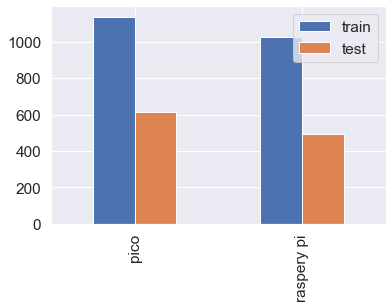

In [9]:
_, train_counts = np.unique(train_labels, return_counts=True)
_, test_counts = np.unique(test_labels, return_counts=True)
pd.DataFrame({'train': train_counts,'test': test_counts}, index=class_names).plot.bar()
plt.show()

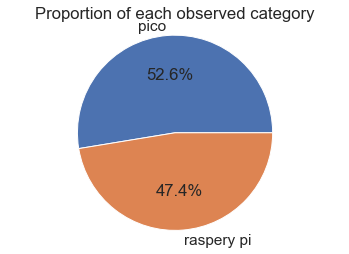

In [11]:
plt.pie(train_counts,
        explode=(0, 0,) , 
        labels=class_names,
        autopct='%1.1f%%')
plt.axis('equal')
plt.title('Proportion of each observed category')
plt.show()

In [12]:
#Scale the data
train_images = train_images / 255.0
test_images = test_images / 255.0

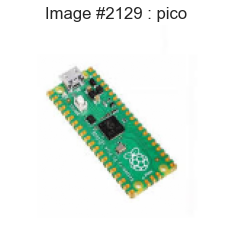

In [13]:
#Visualise the data [random image from training dataset]

def display_random_img(class_names, images, labels):
    index = np.random.randint(images.shape[0])
    plt.figure()
    plt.imshow(images[index])
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.title('Image #{} : '.format(index) + class_names[labels[index]])
    plt.show()
    

display_random_img (class_names, train_images, train_labels)

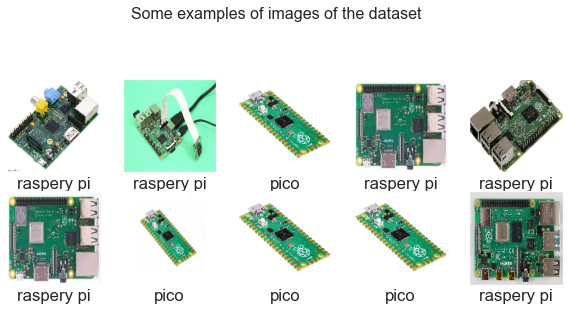

In [14]:
def display_examples(class_names, images, labels):
   
    fig = plt.figure(figsize=(10,10))
    fig.suptitle("Some examples of images of the dataset", fontsize=16)
    for i in range(10):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[labels[i]])
    plt.show()

display_examples(class_names, train_images, train_labels)

### Simple CNN Model

Model Configuration:

* Conv2D: (32 filters of size 3 by 3) The features will be "extracted" from the image.
* MaxPooling2D: The images get half sized.
* Flatten: Transforms the format of the images from a 2d-array to a 1d-array of 150 150 3 pixel values.
* Relu : given a value x, returns max(x, 0).
* Softmax: 6 neurons, probability that the image belongs to one of the classes.

#### **Build Model**

In [15]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(6, activation=tf.nn.softmax)
])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


#### Compiling Model

* Optimizer: adam = RMSProp + Momentum
  * Momentum = takes into account past gradient to have a better update.
  * RMSProp = exponentially weighted average of the squares of past gradients.
  
  
* Loss function: we use sparse categorical crossentropy for classification, each images belongs to one class only


In [16]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

#### **Model Training**

In [18]:
history = model.fit(train_images, train_labels, batch_size=128, epochs=4, validation_split = 0.2)

Train on 1728 samples, validate on 432 samples
Epoch 1/4
1728/1728 [==============================] - 85s 49ms/sample - loss: 0.0157 - acc: 1.0000 - val_loss: 0.0015 - val_acc: 1.0000
Epoch 2/4
1728/1728 [==============================] - 59s 34ms/sample - loss: 0.0012 - acc: 1.0000 - val_loss: 6.5291e-04 - val_acc: 1.0000
Epoch 3/4
1728/1728 [==============================] - 56s 33ms/sample - loss: 3.5807e-04 - acc: 1.0000 - val_loss: 2.8653e-04 - val_acc: 1.0000
Epoch 4/4
1728/1728 [==============================] - 59s 34ms/sample - loss: 1.9937e-04 - acc: 1.0000 - val_loss: 1.7162e-04 - val_acc: 1.0000


In [32]:
model.save("model.h5")

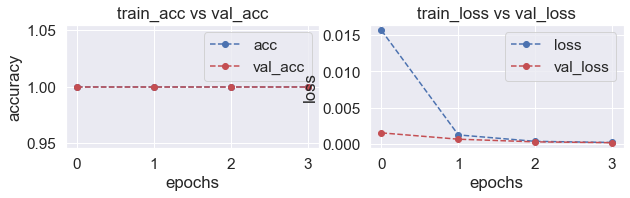

In [26]:
def plot_accuracy_loss(history):
    """
        Plot the accuracy and the loss during the training of the nn.
    """
    fig = plt.figure(figsize=(10,5))

    # Plot accuracy
    plt.subplot(221)
    plt.plot(history.history['acc'],'bo--', label = "acc")
    plt.plot(history.history['val_acc'], 'ro--', label = "val_acc")
    plt.title("train_acc vs val_acc")
    plt.ylabel("accuracy")
    plt.xlabel("epochs")
    plt.legend()

    # Plot loss function
    plt.subplot(222)
    plt.plot(history.history['loss'],'bo--', label = "loss")
    plt.plot(history.history['val_loss'], 'ro--', label = "val_loss")
    plt.title("train_loss vs val_loss")
    plt.ylabel("loss")
    plt.xlabel("epochs")

    plt.legend()
    plt.show()
    
plot_accuracy_loss(history)

In [20]:
test_loss = model.evaluate(test_images, test_labels)

1106/1106 [==============================] - 10s 9ms/sample - loss: 2.4132e-04 - acc: 1.0000


As we can see, the accuracy we achieved was ~ 74% on the test images. This is not the best accuracy, however for this beginner's example it is good.

Let us see this model's prediction accuracy on unseen data

[0 0 0 ... 1 1 1]


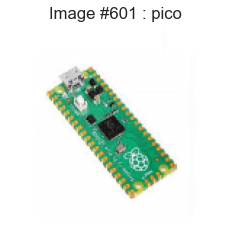

In [34]:
predictions = model.predict(test_images)     # Vector of probabilities
pred_labels = np.argmax(predictions, axis = 1) # We take the highest probability
display_random_img(class_names, test_images, pred_labels)

As we can observe our model has a pretty accurate prediction of the image. However, as seen above the model accuracy is around 74%. This means that around 26% of the un-seen images will get an incorrect prediction.

At this stage either we can accept this accuracy (and keep quiet!) or do an error analysis and understand what sort of images are giving our model the jeepers !! 

### Error Analysis

IndexError: index 0 is out of bounds for axis 0 with size 0

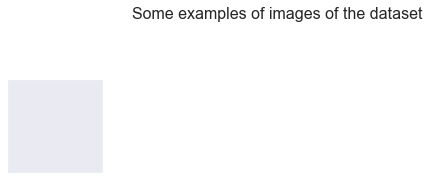

In [30]:
def print_mislabeled_images(class_names, test_images, test_labels, pred_labels):
    BOO = (test_labels == pred_labels)
    mislabeled_indices = np.where(BOO == 0)
    mislabeled_images = test_images[mislabeled_indices]
    mislabeled_labels = pred_labels[mislabeled_indices]

    title = "Some examples of mislabeled images by the classifier:"
    display_examples(class_names,  mislabeled_images, mislabeled_labels)

print_mislabeled_images(class_names, test_images, test_labels, pred_labels)

### Confusion Matrix

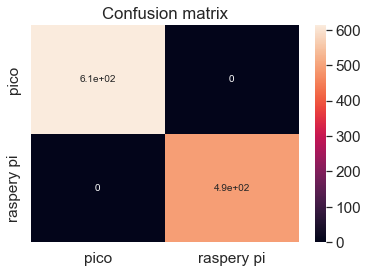

In [29]:
CM = confusion_matrix(test_labels, pred_labels)
ax = plt.axes()
sn.heatmap(CM, annot=True, 
           annot_kws={"size": 10}, 
           xticklabels=class_names, 
           yticklabels=class_names, ax = ax)
ax.set_title('Confusion matrix')
plt.show()

### Conclusion

Our model has trouble classifying sea, glacier and moutains. 